In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import tensorflow as tf

2025-03-25 16:54:08.910901: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-25 16:54:09.304832: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-25 16:54:09.448109: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-25 16:54:09.486293: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-25 16:54:09.770793: I tensorflow/core/platform/cpu_feature_guar

In [2]:
BatchSize = 8
Epochs = 30
ImageSize = 224
Channels = 3

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'New folder/Face_Mask',
    shuffle = True,
    batch_size = 32,
    image_size = (224,224)
)

Found 7553 files belonging to 2 classes.


I0000 00:00:1742901859.226352   47178 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1742901859.578101   47178 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1742901859.578173   47178 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1742901859.584004   47178 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1742901859.584049   47178 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [4]:
dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [5]:
classes = dataset.class_names
classes

['with_mask', 'without_mask']

In [6]:
for image, label in dataset.take(1):
    # print(image)
    print(label.numpy())

[1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0]


2025-03-25 16:54:22.033476: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


2025-03-25 16:54:22.224568: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


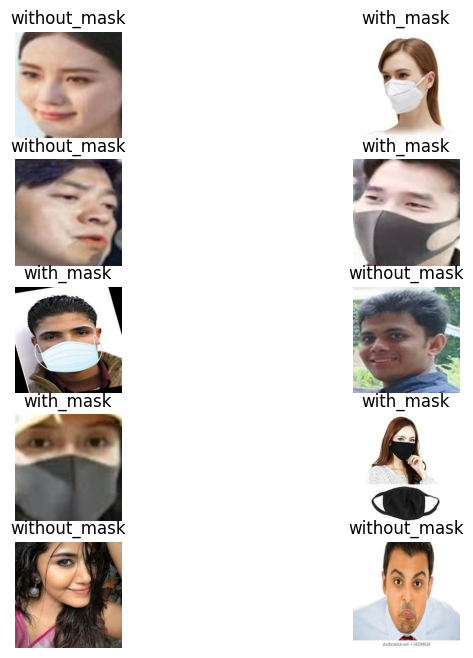

In [7]:
plt.figure(figsize=(8,8))
for image, label in dataset.take(1):
    for i in range(10):
        plt.subplot(5,2,i+1)
        plt.imshow(image[i].numpy().astype(int))
        plt.title(classes[label[i].numpy()])
        plt.axis('off')

In [8]:
dataset = dataset.map(lambda x, y: (x/255.0, y)).filter(lambda x, y: x is not None and y is not None)


Cause: could not parse the source code of <function <lambda> at 0x7f607c139360>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
lambda x, y: x is not None and y is not None

Match 1:
lambda x, y: (x / 255.0, y)

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x7f607c139360>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
lambda x, y: x is not None and y is not None

Match 1:
lambda x, y: (x / 255.0, y)

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 

In [9]:
for image in dataset.take(1):
    print(image)

(<tf.Tensor: shape=(32, 224, 224, 3), dtype=float32, numpy=
array([[[[0.7488533 , 0.73316705, 0.63512784],
         [0.75822765, 0.7425414 , 0.64450216],
         [0.7507003 , 0.73249304, 0.64201677],
         ...,
         [0.6293713 , 0.60444134, 0.5415774 ],
         [0.6550089 , 0.62587714, 0.5620303 ],
         [0.6554009 , 0.62010676, 0.5534401 ]],

        [[0.7445991 , 0.7279149 , 0.6303746 ],
         [0.7549638 , 0.7382797 , 0.6407394 ],
         [0.74866885, 0.7297844 , 0.6394864 ],
         ...,
         [0.6247664 , 0.5998364 , 0.53429013],
         [0.6588843 , 0.6297525 , 0.56000465],
         [0.66616774, 0.6308736 , 0.56420696]],

        [[0.74200803, 0.7184786 , 0.624361  ],
         [0.7343531 , 0.7108237 , 0.616706  ],
         [0.7292098 , 0.7056804 , 0.61660475],
         ...,
         [0.6493318 , 0.6238078 , 0.5585585 ],
         [0.6687886 , 0.6383501 , 0.56925565],
         [0.65609246, 0.62079835, 0.5541317 ]],

        ...,

        [[0.8666667 , 0.9364233 

In [10]:
def split(ds, train_size=0.8, val_size=0.1, test_size=0.1):
    dataset_size = tf.data.experimental.cardinality(ds).numpy()
    train_size = int(train_size * dataset_size)
    val_size = int(val_size * dataset_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [11]:
train_ds, val_ds, test_ds = split(dataset)

In [12]:
train_ds = train_ds.shuffle(1000).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [13]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(ImageSize, ImageSize, Channels)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout added
    Dense(1, activation='sigmoid')  # Use sigmoid for binary classification
])

/home/aditya3770/Anaconda3/envs/py310/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
hist = model.fit(
    train_ds,
    epochs=Epochs,
    validation_data=val_ds
)

Epoch 1/30


2025-03-25 16:54:30.020082: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:1641] failed to alloc 2147483648 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2025-03-25 16:54:30.022918: W external/local_xla/xla/stream_executor/integrations/device_host_allocator.h:61] could not allocate pinned host memory of size: 2147483648
2025-03-25 16:54:30.023188: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:1641] failed to alloc 1932735232 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2025-03-25 16:54:30.023208: W external/local_xla/xla/stream_executor/integrations/device_host_allocator.h:61] could not allocate pinned host memory of size: 1932735232
2025-03-25 16:54:30.023220: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:1641] failed to alloc 1739461632 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2025-03-25 16:54:30.023224: W external/local_xla/xla/stream_executor/integrations/device_host_allocator.h:61] could not allocate pinn